<a href="https://colab.research.google.com/github/UzmaMahmoodSSUET/bootcamp_datasci/blob/main/lung_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras import layers
from keras import models

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

In [4]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [5]:
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [6]:
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [7]:
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(
    "/content/drive/MyDrive/lung_cancer_dataset/training",
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')


Found 440 images belonging to 2 classes.


In [11]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [13]:
history = model.fit_generator(
    train_generator,
    epochs=30)

<ipython-input-13-1bcbc5ac8797>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
22/22 [==============================] - 33s 1s/step - loss: 0.6156 - acc: 0.6886
Epoch 2/30
22/22 [==============================] - 32s 1s/step - loss: 0.5098 - acc: 0.7705
Epoch 3/30
22/22 [==============================] - 32s 1s/step - loss: 0.4177 - acc: 0.8205
Epoch 4/30
22/22 [==============================] - 32s 1s/step - loss: 0.3763 - acc: 0.8250
Epoch 5/30
22/22 [==============================] - 32s 1s/step - loss: 0.3395 - acc: 0.8364
Epoch 6/30
22/22 [==============================] - 31s 1s/step - loss: 0.3174 - acc: 0.8659
Epoch 7/30
22/22 [==============================] - 32s 1s/step - loss: 0.2995 - acc: 0.8795
Epoch 8/30
22/22 [==============================] - 34s 2s/step - loss: 0.2786 - acc: 0.8886
Epoch 9/30
22/22 [==============================] - 31s 1s/step - loss: 0.2523 - acc: 0.8886
Epoch 10/30
22/22 [==============================] - 32s 1s/step - loss: 0.2490 - acc: 0.8909
Epoch 11/30
22/22 [==============================] - 31s 1s/step - lo

In [29]:
test_generator = test_datagen.flow_from_directory(
                                '/content/drive/MyDrive/lung_cancer_dataset/test',
                                target_size=(150,150),
                                batch_size=20,
                                class_mode='binary')

Found 94 images belonging to 2 classes.


In [26]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['acc'])

In [30]:
model.evaluate(test_generator)

5/5 [==============================] - 2s 402ms/step - loss: 0.3272 - acc: 0.9043


[0.3271648585796356, 0.9042553305625916]

In [42]:
y_pred = model.predict(test_generator)
y_pred


5/5 [==============================] - 3s 660ms/step


array([[9.93742049e-01],
       [3.62788069e-06],
       [7.32148910e-05],
       [2.74158213e-02],
       [5.30923195e-02],
       [5.91930747e-03],
       [4.25986666e-03],
       [9.98794317e-01],
       [1.11138448e-03],
       [1.93165109e-01],
       [1.71321305e-03],
       [9.82278705e-01],
       [9.99089479e-01],
       [1.59356780e-02],
       [8.50318279e-03],
       [6.78112637e-03],
       [1.11887775e-05],
       [6.11730032e-02],
       [9.97314572e-01],
       [2.09080918e-05],
       [4.22461890e-02],
       [1.81246141e-05],
       [3.31777451e-03],
       [6.19991004e-01],
       [9.95905519e-01],
       [8.61185777e-04],
       [9.91188347e-01],
       [8.50318279e-03],
       [9.91425395e-01],
       [2.47738883e-03],
       [9.74260569e-01],
       [3.03999358e-03],
       [9.82488453e-01],
       [6.50112629e-01],
       [9.97567654e-01],
       [8.21246533e-04],
       [9.97874916e-01],
       [3.97459567e-02],
       [1.37823154e-04],
       [2.07524793e-03],


In [43]:
y_pred = [1 if y>0.5 else 0 for y in y_pred]
y_pred

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0]

In [44]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
report = classification_report(test_labels, (y_pred))
print(report)

              precision    recall  f1-score   support

           0       0.54      0.62      0.57        47
           1       0.55      0.47      0.51        47

    accuracy                           0.54        94
   macro avg       0.54      0.54      0.54        94
weighted avg       0.54      0.54      0.54        94



<Axes: >

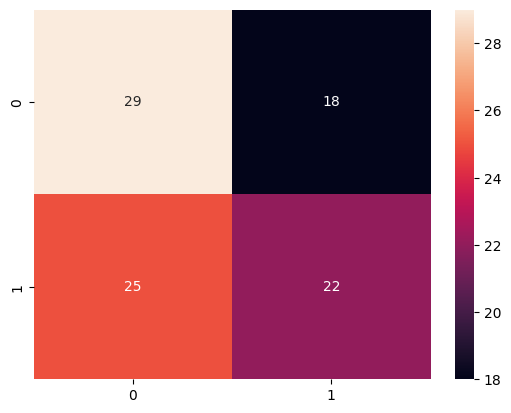

In [47]:
confusion = confusion_matrix(test_labels, y_pred)
confusion
import seaborn as sns
sns.heatmap(confusion, annot=True)